### About the Dataset

Dataset Source: Kaggle
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

In [19]:
# importing the neccassary libraries
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [3]:
# importing the dataset
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [25]:
reviews.shape

(20491, 6)

In [4]:
reviews['Label'] = reviews.Rating >3 
reviews.head()

,Review,Rating,Label
0,nice hotel expensive parking got good deal sta...,4,True
1,ok nothing special charge diamond member hilto...,2,False
2,nice rooms not 4* experience hotel monaco seat...,3,False
3,"unique, great stay, wonderful time hotel monac...",5,True
4,"great stay great stay, went seahawk game aweso...",5,True


In [5]:
reviews = reviews.replace({True: 'pos', False: 'neg'})
reviews.head()

,Review,Rating,Label
0,nice hotel expensive parking got good deal sta...,4,pos
1,ok nothing special charge diamond member hilto...,2,neg
2,nice rooms not 4* experience hotel monaco seat...,3,neg
3,"unique, great stay, wonderful time hotel monac...",5,pos
4,"great stay great stay, went seahawk game aweso...",5,pos


In [6]:
reviews.dtypes

Review    object
Rating     int64
Label     object
dtype: object

In [7]:
blanks = []  # start with an empty list

for i,rv,rt,lb in reviews.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [8]:
reviews['Label'].value_counts()

pos    15093
neg     5398
Name: Label, dtype: int64

In [9]:
sid = SentimentIntensityAnalyzer()

In [10]:
sid.polarity_scores(reviews.loc[0]['Review'])

{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747}

In [11]:
# adding Sentiment Intensity scores to dataframe
reviews['Scores'] = reviews['Review'].apply(lambda Review: sid.polarity_scores(Review))

reviews.head()

,Review,Rating,Label,Scores
0,nice hotel expensive parking got good deal sta...,4,pos,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co..."
1,ok nothing special charge diamond member hilto...,2,neg,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
2,nice rooms not 4* experience hotel monaco seat...,3,neg,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp..."
3,"unique, great stay, wonderful time hotel monac...",5,pos,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,pos,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."


In [12]:
reviews['compound']  = reviews['Scores'].apply(lambda score_dict: score_dict['compound'])

reviews.head()

,Review,Rating,Label,Scores,compound
0,nice hotel expensive parking got good deal sta...,4,pos,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747
1,ok nothing special charge diamond member hilto...,2,neg,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,neg,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889
3,"unique, great stay, wonderful time hotel monac...",5,pos,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912
4,"great stay great stay, went seahawk game aweso...",5,pos,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797


In [13]:
reviews['comp_score'] = reviews['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

reviews.head()

,Review,Rating,Label,Scores,compound,comp_score
0,nice hotel expensive parking got good deal sta...,4,pos,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,pos
1,ok nothing special charge diamond member hilto...,2,neg,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,pos
2,nice rooms not 4* experience hotel monaco seat...,3,neg,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,pos
3,"unique, great stay, wonderful time hotel monac...",5,pos,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,pos
4,"great stay great stay, went seahawk game aweso...",5,pos,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,pos


In [14]:
reviews.comp_score.value_counts()

pos    18874
neg     1617
Name: comp_score, dtype: int64

In [15]:
accuracy_score(reviews['Label'], reviews['comp_score'])

0.805133961251281

In [16]:
print(classification_report(reviews['Label'],reviews['comp_score']))

              precision    recall  f1-score   support

         neg       0.93      0.28      0.43      5398
         pos       0.79      0.99      0.88     15093

    accuracy                           0.81     20491
   macro avg       0.86      0.64      0.66     20491
weighted avg       0.83      0.81      0.76     20491



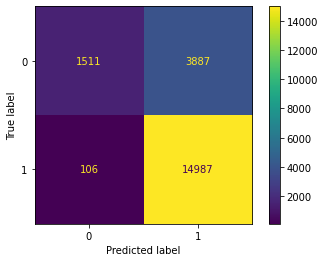

In [24]:
cm = confusion_matrix(reviews['Label'],reviews['comp_score'])
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

### Model Explanation

The model I built was designed to analyze hotel reviews sourced from a Kaggle dataset that included 20,491 rows with two columns: 'review' and 'rating'. To enhance the dataset's usability, I engineered a new column labeled 'label', categorizing ratings higher than 4 as 'True' and those equal to or less than 3 as 'False'. This labeling aimed to convert the ratings into a binary classification for sentiment analysis.

Utilizing the SentimentIntensityAnalyzer from the Natural Language Toolkit (NLTK), I computed polarity scores and compound scores for each review. The compound score, indicative of the overall sentiment, determined whether the sentiment was positive or not. If the compound score was greater than or equal to 0, it was classified as 'positive'; otherwise, it was classified as 'negative'.

The model's performance was evaluated based on accuracy, resulting in an approximate accuracy rate of 80%. This indicates that the model correctly predicted sentiment labels (positive or negative) for 80% of the hotel reviews in the dataset.

Despite achieving a reasonably high accuracy rate, there are aspects to consider for further refinement. Exploring additional feature engineering, employing different machine learning algorithms, or performing hyperparameter tuning could potentially enhance the model's accuracy and robustness when classifying sentiment in hotel reviews. Additionally, conducting a more comprehensive evaluation, such as utilizing cross-validation techniques, would provide a more thorough understanding of the model's generalization capability.